In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.append("../")
import matplotlib.pyplot as plt

SMALLER_SIZE = 10
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
from curve_models import NLLS, NLLS_w, NLLS_rse, power_law, CurveModel, linearized_power_law
sns.set_style('white')
dataset_titles = {'gl': 'GoogleLocal-L', 'gl-tiny': 'GoogleLocal-S', 'ml-20m-tiny': 'MovieLens-S',
                 'ml-20m-uniform': 'MovieLens-L'}

In [2]:
# These experiment names should be identical to the output files 
# in curve_fitting_expmt.py
gl_expmt = '0.1_5_False_uniform_30_0.5_0.5_5800_29000_290001'
ml_expmt = '0.1_5_False_uniform_30_0.5_0.5_20000_100000_1000001'
mltiny_expmt = '0.1_5_False_uniform_30_0.5_0.5_5250_21000_213973'
gltiny_expmt = '0.1_5_False_uniform_30_0.5_0.5_1880_9400_94001'

expmts = [('gl', gl_expmt), ('gl-tiny', gltiny_expmt), 
          ('ml-20m-uniform', ml_expmt), ('ml-20m-tiny', mltiny_expmt)]
all_results = []
for i, (dataset_name, _) in enumerate(expmts):
    results_df = pd.read_csv('../results/forecasting/' + dataset_name + '/random_pred_performance')
    results_df = results_df.round({'pred_pct': 2, 'true_pct': 2})
    results_df['dataset'] = dataset_name
    all_results.append(results_df)
all_results = pd.concat(all_results)

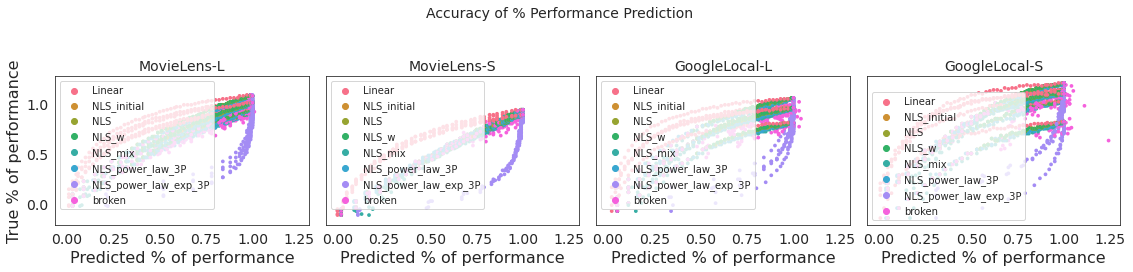

In [4]:
expmts = [('ml-20m-uniform', ml_expmt), ('ml-20m-tiny', mltiny_expmt), ('gl', gl_expmt), ('gl-tiny', gltiny_expmt)]
#expmts = [('ml-20m-tiny', mltiny_expmt)]

with sns.xkcd_palette(["greyish", "pink", "amber", "denim blue", "medium green"]):
    fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(16, 4))

    for i, (dataset_name, _) in enumerate(expmts):
        #ax = axs[int(i/2), i%2]
        ax = axs[i]
        #hue_order = ['Linear', 'NLS_initial', 'NLS', 'NLS_w', 'NLS_mix']
        results_df = pd.read_csv('../results/forecasting/' + dataset_name + '/regular_pred_performance')
        results_df = results_df.round({'pred_pct': 2, 'true_pct': 2})
        results_df['dataset'] = dataset_name
        cm_results = results_df[results_df['cm'] != 'True']
        sns.scatterplot(x='pred_pct', y='true_pct', data=cm_results, hue=cm_results.cm.tolist(),
                        s=14, linewidth=0, ax=ax)
#ax.plot([i for i in np.arange(0, 1, .1)], [i for i in np.arange(0, 1, .1)], c='r', label='True')
        #ax.set_xlim(0, 1)
        #ax.set_ylim(0, 1)
        ax.set_ylabel("True % of performance")
        ax.set_xlabel("Predicted % of performance")
        ax.set_title(dataset_titles[dataset_name])
plt.suptitle("Accuracy of % Performance Prediction", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../figs/performance_pred.png')

In [ ]:
sns.set_style('white')
expmts = [('ml-20m-uniform', ml_expmt), ('ml-20m-tiny', mltiny_expmt), ('gl', gl_expmt), ('gl-tiny', gltiny_expmt)]
with sns.xkcd_palette(["greyish", "pink", "amber", "denim blue", "medium green", "red"]):
    fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(16, 4))

    for i, (dataset_name, _) in enumerate(expmts):
        #ax = axs[int(i/2), i%2]
        ax  = axs[i]
        #hue_order = ['Linear', 'NLS_initial', 'NLS', 'NLS_w', 'NLS_mix', 'True']
        results_df = pd.read_csv('../results/forecasting/' + dataset_name + '/regular_pred_performance')
        results_df = results_df.round({'pred_pct': 4, 'true_pct': 4})
        #cm_results = results_df[results_df['cm'] != 'True']
        sns.scatterplot(x='pct_available', y='pred_pct', data=results_df, 
                        hue=results_df.cm.tolist(), s=14,
                          linewidth=0, ax=ax)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_ylabel("Predicted % of performance")
        ax.set_xlabel("Percentage of data collected")
        ax.set_title(dataset_titles[dataset_name])
plt.suptitle("Accuracy of % Performance Prediction", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../figs/performance_pred_v_pct_available.png')

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 10))
#hue_order = ['Linear', 'NLS_initial', 'NLS', 'NLS_w', 'NLS_mix', 'True']
results_df = pd.read_csv('../results/forecasting/' + dataset_name + '/regular_pred_performance')
results_df = results_df.round({'pred_pct': 4, 'true_pct': 4})
#cm_results = results_df[results_df['cm'] != 'True']
sns.scatterplot(x='pct_available', y='pred_pct', data=results_df)
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_ylabel("Predicted % of performance")
# ax.set_xlabel("Percentage of data collected")

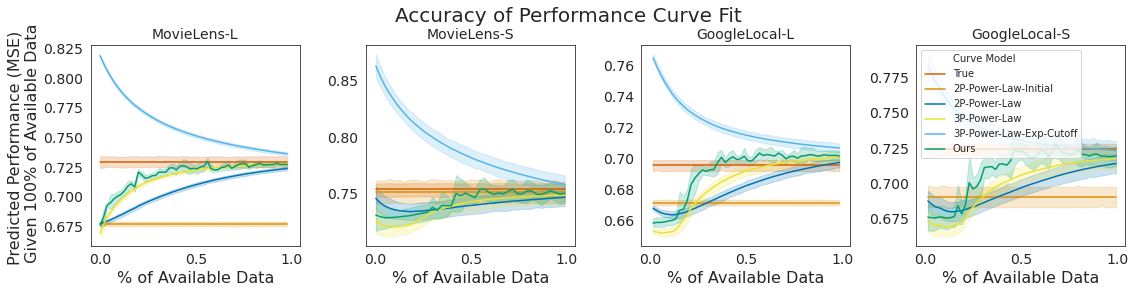

In [7]:
# plot best_mse prediction over pct_available
fig, axs = plt.subplots(1, 4, sharex=True, figsize=(16, 4))
hue_order = ['True', 'NLS_initial', 'NLS_w', 'NLS_power_law_3P', 'NLS_power_law_exp_3P', 'broken']
colors = sns.color_palette("colorblind")
sns.set_palette([colors[3], colors[1], colors[0], colors[8], colors[9], colors[2]])
for i, (dataset_name, _) in enumerate(expmts):

    ax = axs[i]
    forecasting_cms = all_results[all_results['cm'].isin(hue_order)]
    dataset_results = forecasting_cms[forecasting_cms['dataset'] == dataset_name]
    sns.lineplot(x='pct_available', y='pred_best', hue='cm', 
                 hue_order=hue_order,
                 data=dataset_results, ax=ax)
    ax.set_title(dataset_titles[dataset_name])
    if i == 0:
        ax.set_ylabel("Predicted Performance (MSE) \n Given 100% of Available Data")
    else:
        ax.set_ylabel("")

    if i == 2 or i == 3:
        ax.set_xlabel("% of Available Data")
    else:
        ax.set_xlabel("")
    ax.set_xlabel("% of Available Data")
    if i != 3:
        ax.get_legend().remove()
    else:
        L=ax.get_legend()
        new_names = ['Curve Model', 'True', '2P-Power-Law-Initial', '2P-Power-Law', '3P-Power-Law', 
                     '3P-Power-Law-Exp-Cutoff', 'Ours']
        for i,new in enumerate(new_names):
            L.get_texts()[i].set_text(new)
plt.tight_layout()
suptitle = plt.suptitle("Accuracy of Performance Curve Fit", y=1.02)

plt.savefig('../figs/pred_best_performance_random.png', bbox_inches='tight',bbox_extra_artists=[suptitle])


In [ ]:
plt.figure(figsize=(10,10))
dataset_name = 'ml-20m-tiny'
forecasting_cms = all_results[all_results['cm'] !='Linear']
dataset_results = forecasting_cms[forecasting_cms['dataset'] == dataset_name]
sns.lineplot(x='pct_available', y='pred_best', hue=dataset_results.cm.tolist(), data=dataset_results)
plt.ylim(23000, 25000)

In [ ]:
with sns.xkcd_palette(["greyish", "pink", "amber", "denim blue", "medium green", "red"]):
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8, 8))

    for i, (dataset_name, _) in enumerate(expmts):
        if dataset_name != 'gl-tiny':
            continue
        #hue_order = ['Linear', 'NLS_initial', 'NLS', 'NLS_w', 'NLS_mix', 'True']
        results_df = pd.read_csv('../results/forecasting/' + dataset_name + '/regular_pred_performance')
        results_df = results_df.round({'pred_pct': 4, 'true_pct': 4})
        #cm_results = results_df[results_df['cm'] != 'True']
        sns.lineplot(x='pct_available', y='pred_pct', data=results_df, 
                     hue=results_df.cm.tolist(), ax = ax)
                         #s=14, linewidth=0
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_ylabel("Predicted % of performance")
        ax.set_xlabel("Percentage of data collected")

        L=ax.get_legend()
        #new_names = ['Curve Models', 'Linear', 'Initial', 'NLS', 'NLSw', 'Ours']
#         for i,new in enumerate(new_names):
#             L.get_texts()[i].set_text(new)
        ax.set_title(dataset_titles[dataset_name])
plt.suptitle("Accuracy of % Performance Prediction", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../figs/performance_pred_v_pct_available.png')

In [ ]:
# plot best_mse prediction over pct_available
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(4, 4))
#hue_order = ['NLS_initial', 'NLS', 'NLS_w', 'NLS_mix', 'True']
dataset_name = 'ml-20m-uniform'
yname = 'pred_worst'
with sns.xkcd_palette(["pink", "amber", "denim blue", "medium green", "red"]):
        forecasting_cms = all_results[all_results['cm'] !='Linear']
        dataset_results = forecasting_cms[forecasting_cms['dataset'] == dataset_name]
        
        sns.lineplot(x='pct_available', y=yname, hue=dataset_results.cm.tolist(), 
                     data=dataset_results, ax=ax, hue_order=hue_order)
        plt.xlabel("Percentage of data collected")
        plt.ylabel("Predicted MSE")
#         if 'best' in yname:
#             plt.title("Prediction of Best MSE: " + dataset_titles[dataset_name])
#             L=ax.get_legend()
#             new_names = ['Curve Models', 'Initial', 'NLS', 'NLSw', 'Ours']
#             for i,new in enumerate(new_names):
#                 L.get_texts()[i].set_text(new)
#         else:
#             plt.title("Prediction of Worst MSE: " + dataset_titles[dataset_name])

        

In [ ]:
# plot best_mse prediction over pct_available
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(8, 8))
#hue_order = ['NLS_initial', 'NLS', 'NLS_w', 'NLS_mix', 'True']
with sns.xkcd_palette(["pink", "amber", "denim blue", "medium green", "red"]):
    for i, (dataset_name, _) in enumerate(expmts):
        ax = axs[int(i/2), i%2]
        forecasting_cms = all_results[all_results['cm'] !='Linear']
        dataset_results = forecasting_cms[forecasting_cms['dataset'] == dataset_name]
        sns.lineplot(x='pct_available', y='pred_worst', hue=dataset_results.cm.tolist(), 
                     data=dataset_results, ax=ax)
        ax.set_title(dataset_titles[dataset_name])
#         if i != 3:
#             ax.get_legend().remove()
#         else:
#             L=ax.get_legend()
#             new_names = ['Curve Models', 'Initial', 'NLS', 'NLSw', 'Ours']
#             for i,new in enumerate(new_names):
#                 L.get_texts()[i].set_text(new)

In [ ]:
# Plot stopping criterions
goals = [.5, .6, .7, .8, .9]
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(18, 6))
dataset_name = 'gl'
hue_order = ['NLS_initial', 'NLS_w', 'NLS_power_law_3P', 'NLS_power_law_exp_3P', 'broken']
colors = sns.color_palette("tab10")
sns.set_palette([colors[1], colors[0], colors[8], colors[9], colors[2]])
for i, g in enumerate(goals):
    ax = axs[i]
    test_df = all_results[all_results['pred_pct'] > g]
    test_df = test_df[test_df['cm'].isin(hue_order)]

    ax.axhline(y=g, c='r', label='Goal', lw=5)

    draw_df = test_df.sort_values('pred_pct').groupby(['cm', 'run', 'dataset']).first().reset_index()
    dataset_df = draw_df[draw_df['dataset'] == dataset_name]
    sns.pointplot(x='cm', y='true_pct', hue='cm', hue_order=hue_order, 
                  data=dataset_df, ax=ax, join=False, errwidth=8, scale=2)
    #ax.set_xticklabels(['Linear', 'Initial', 'NLS', 'NLSw', 'Ours'])
    ax.set_xlabel("Curve Model")
    ax.set_ylabel("True % of Performance")
    ax.set_title("Goal: " + str(g))
    xticklabels = ax.set_xticklabels([])
    #ax.set_xticklabels(xticklabels, rotation = 45, ha="right")

    if i > 0:
        ax.set_ylabel("")
    if i != 4:
        ax.get_legend().remove()
    else:
        ax.legend(title='Curve Model')
        L=ax.get_legend()
        print(L.get_texts())
        new_names = ['Goal', '2P-Power-Law-Initial', '2P-Power-Law', '3P-Power-Law', 
                     '3P-Power-Law-Exp-Cutoff', 'Ours']
        for j,new in enumerate(new_names):
            L.get_texts()[j].set_text(new)

plt.tight_layout()
suptitle = plt.suptitle(dataset_titles[dataset_name], y=1.02)
plt.savefig('../figs/' + dataset_name + '_stopping_criterion.png', bbox_inches='tight',bbox_extra_artists=[suptitle])

# Filter pred_pct for being greater than goal percentage g 
# Choose the minimum entry, record true percentage
# For a given goal percentage g, at what point do different algorithms stop? 